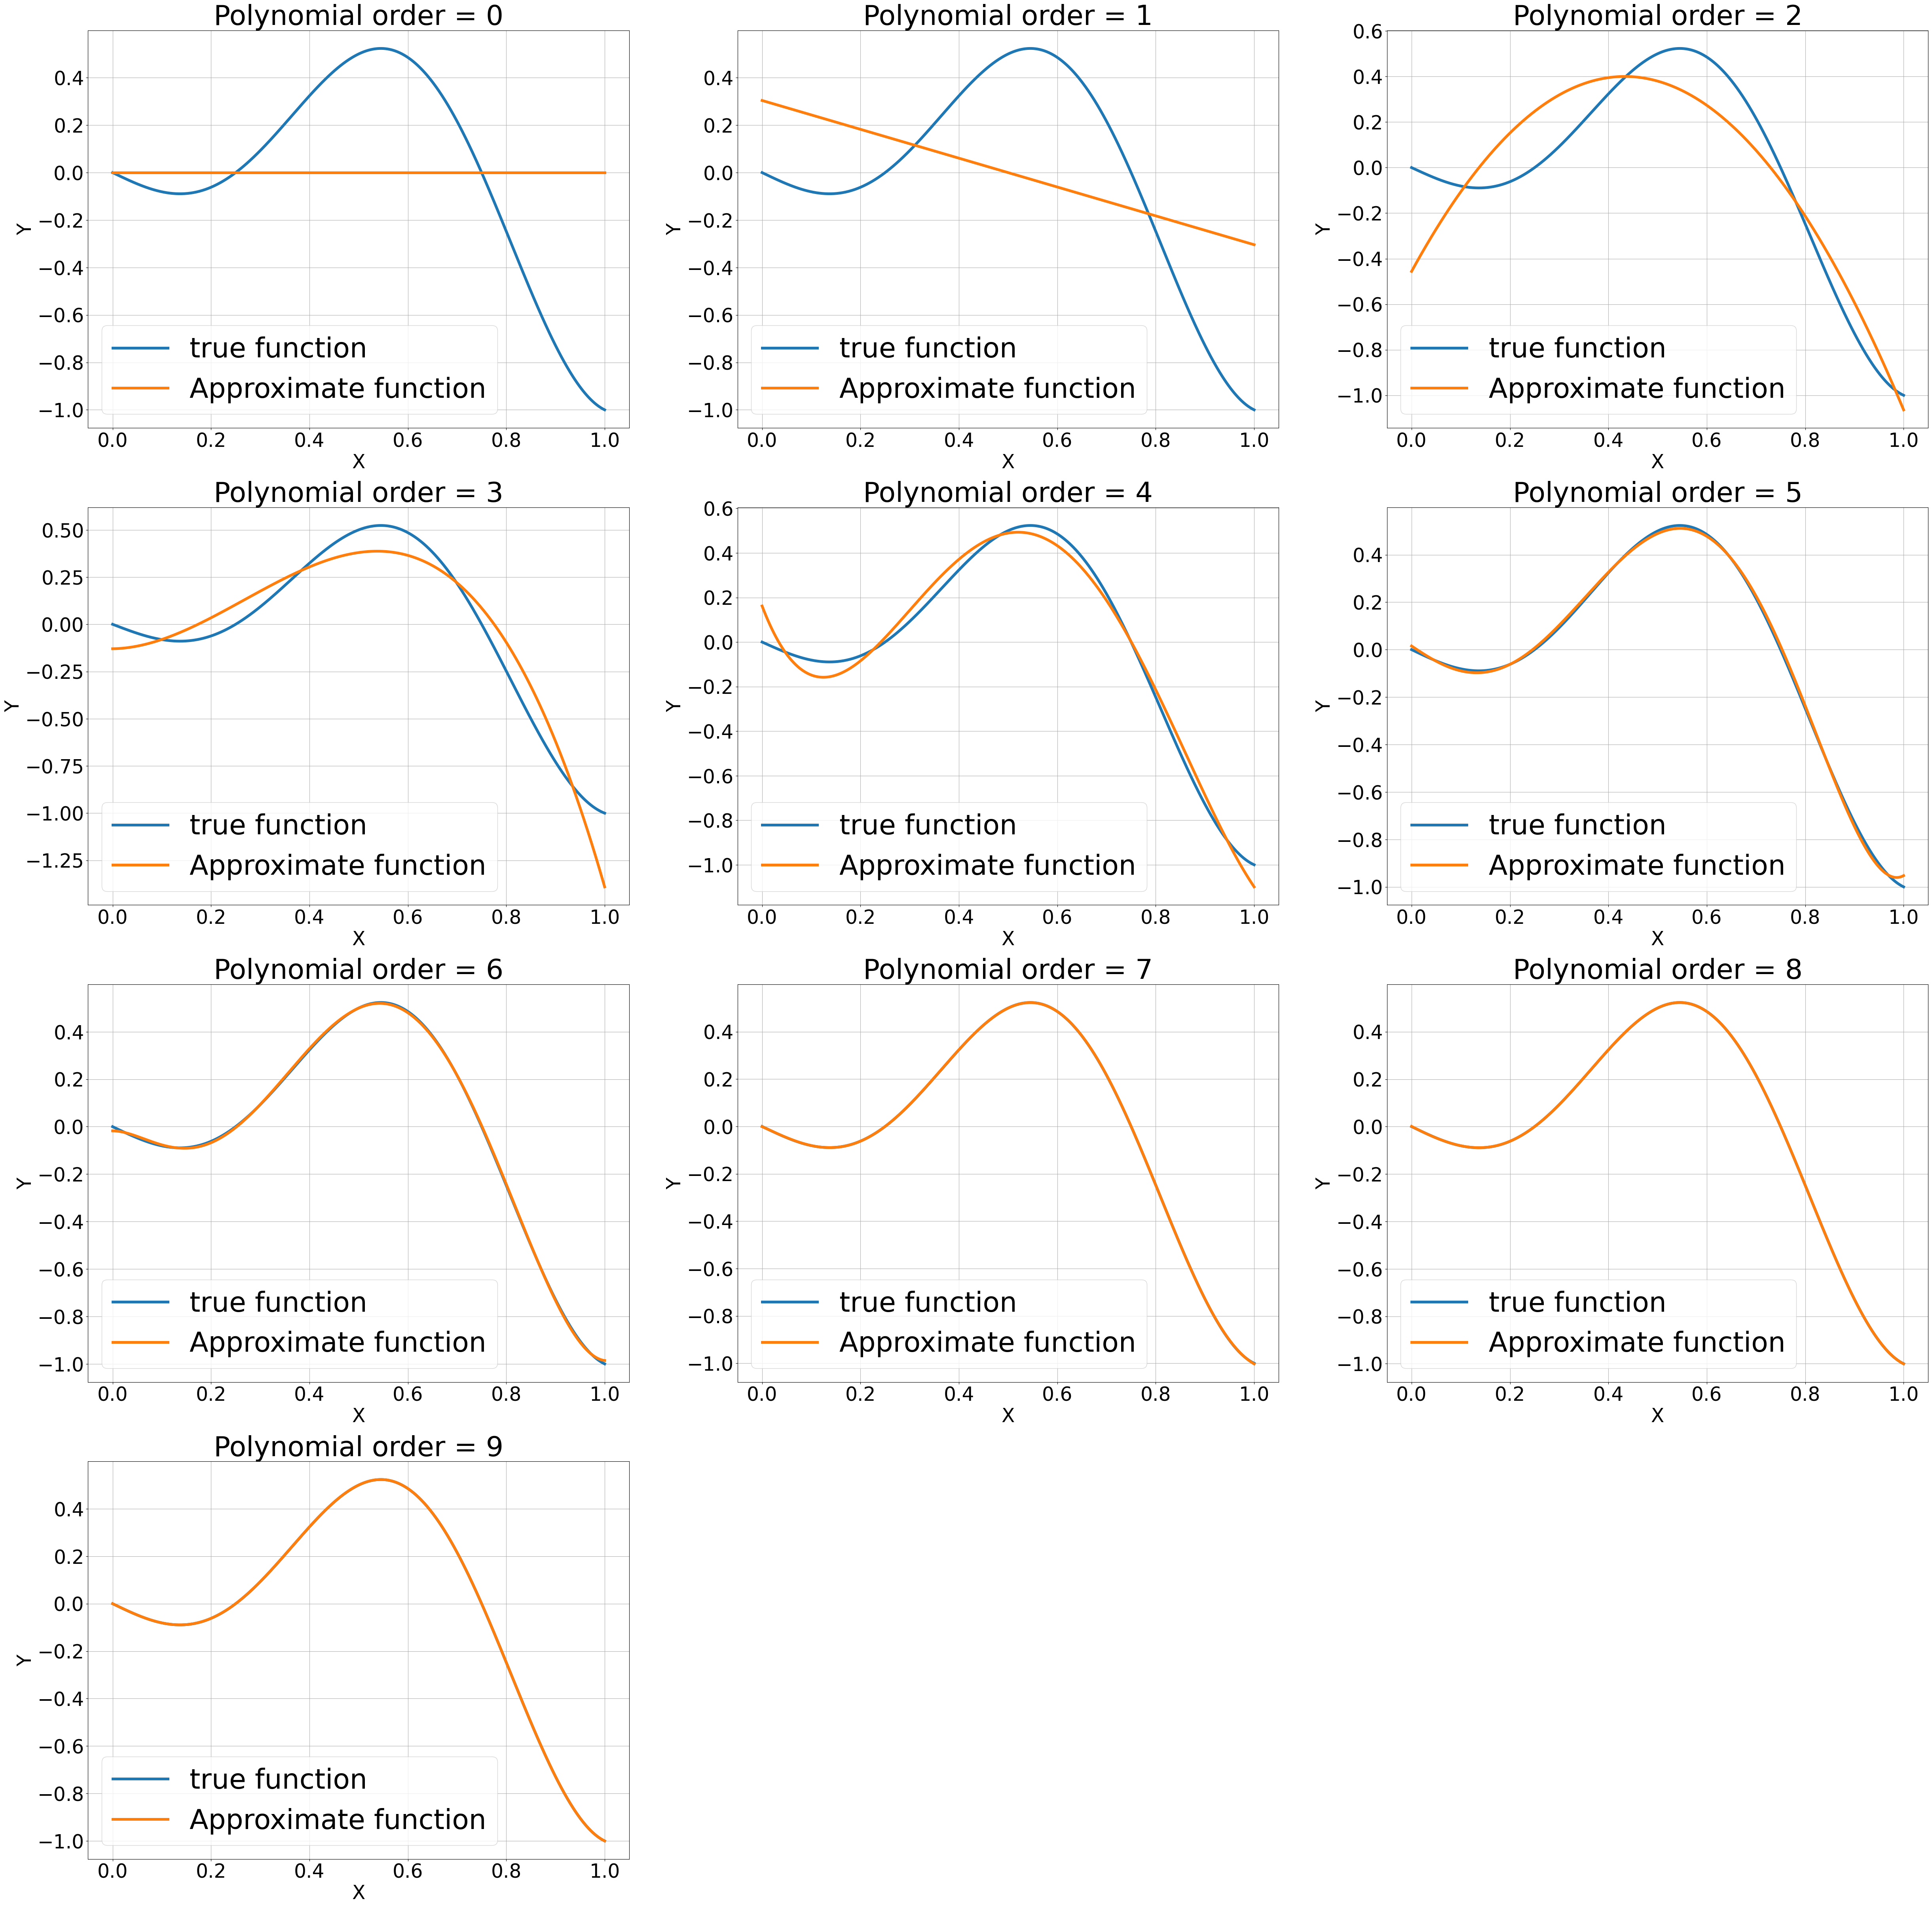

In [24]:
#Import libraries
import numpy as np
from scipy import integrate 
import matplotlib.pyplot as plt

#define the variables
l1 = 0
l2 = 1
omega = 2
poly_orders = np.arange(1,11)
graph_per_row = 3 #number of plots per row define by user
row = round((len(poly_orders)/graph_per_row))+1 #total numbers of rows
col = graph_per_row #total numbers of columns
fig = plt.figure(figsize=(60,60)) 

for poly_order in poly_orders:
    #define the functions
    u = lambda x:-x*np.cos(omega*np.pi*x)
    basis = np.array([lambda x,n=i:x**n for i in range(poly_order)])

    #define the required variables to store values
    k = np.empty((poly_order,poly_order))
    c = np.empty((poly_order))
    f = np.empty((poly_order))

    #filling of the required variables
    for i in range(poly_order):
        function_f = lambda x,i=i:u(x)*basis[i](x)
        f[i] = integrate.quad(function_f,l1,l2)[0]
        for j in range(poly_order):
            function_k = lambda x,i=i,j=j:basis[i](x)*basis[j](x)
            k[i,j] = integrate.quad(function_k,l1,l2)[0]

    #solve the governing equation > {c} = inverse([K])@{f}
    c = np.linalg.solve(k,f)

    #define the apporximate function having polynomical basis
    w_star = lambda x:sum(c[i]*basis[i](x) for i in range(poly_order))

    #range of X
    x = np.linspace(l1,l2,500)
    
    plt.subplot(row,col,poly_order)
    #plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    plt.grid()
    plt.plot(x,u(x),linewidth = 5)
    plt.plot(x,w_star(x),linewidth = 5)
    plt.title("Polynomial order = {}".format(poly_order-1),fontsize=50)
    plt.xlabel("X",fontsize=35)
    plt.ylabel("Y",fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.legend(["true function","Approximate function"],fontsize=50)
plt.savefig('./Assignment01.png')
plt.show()